# Classification Using K-Nearest Neighbors(KNN)

KNN ia a supervised machine learning algorithm.Data is trained with data points corresponding to their classifcation.To predict a point it's k-nearest are taken in to account to determine it's classification.

## Import Libraries

In [20]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

Dataset used here is of cutomers, provided by telecommunications provider.Telecommunication provider segmented its customer base by service usage patterns, and there are four categories of cutomers.If demographic cutomers can be used to predict category/group , company can customize offers for individual customer.

It is classification problem.Using the provided labeled data, model is built in this notebook to predict class of a new case.

Demographic data such as age, region and marital status are used to predict usage pattern.

__custcat__ is the target field and has four possible values corresponding to four groups,

 1- Basic Service
 
 2- E-Service
 
 3- Plus Service
 
 4- Total Service
 
Objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

### Load Data From CSV File 

In [22]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Data Visualization and Analysis

In [23]:
df['custcat'].value_counts() #how many of each class is indata set 

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000148980808D0>]],
      dtype=object)

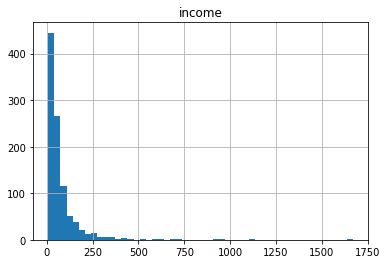

In [24]:
df.hist(column='income', bins=50)

## Features Set

In [25]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [26]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [27]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Data Normalization

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases.

After standardization all features have values between 0 and 1.

In [28]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

# Spliting Data into train and test

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=True)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# Classification

In [33]:
#import library
from sklearn.neighbors import KNeighborsClassifier

## Outline and train model

#### Using k=4

In [35]:
k=4

model=KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)

model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

## Testing 

In [36]:
y_predicted=model.predict(X_test)

y_predicted[0:5]

array([1, 1, 1, 3, 1], dtype=int64)

## Evaluation of Accuracy

In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [38]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_predicted))

Train set Accuracy:  0.565
Test set Accuracy:  0.34


## KNN-Classifier for k=6


In [40]:
print("Calssifier built using K=6")
k=6

model=KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)

y_predicted=model.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_predicted))

Calssifier built using K=6
Train set Accuracy:  0.525
Test set Accuracy:  0.315


## How to choose right K

K in KNN, is the number of nearest neighbors to examine.

Reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in  test set. Repeat this process, increasing the k, and see which k is the best for your model.

K with highest accuracy is right value of K.

In [42]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    y_predicted=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, y_predicted)

    
    std_acc[n-1]=np.std(y_predicted==Y_test)/np.sqrt(y_predicted.shape[0])

mean_acc

array([0.29 , 0.33 , 0.345, 0.34 , 0.32 , 0.315, 0.31 , 0.35 , 0.335,
       0.38 ])

## Accuracy Plot for different K

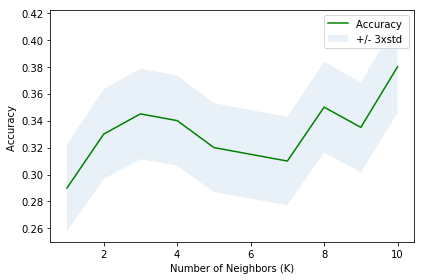

In [45]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [46]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.38 with k= 10
